# **Home Assignment #9 (Ch9 Additive Models & Trees)**
## Aleksandr Zybin ICEF
## Gregory Antonovsky DSBA

## **Problem 1 (Ex 9.1, p.335. Smoothing splines.)**

### **Show that a smoothing spline ﬁt of $y_i$ to $x_i$ preserves the linear part of the ﬁt. In other words, if $y_{i}=\hat{y}_{i}+r_{i}$, where $\hat{y}_{i}$ represents the linear regression ﬁts, and $S$ is the smoothing matrix, then $Sy=\hat{y}+Sr$.**

Accodrding to the hint provided by Oleg Melnikov in the discussion thread of the question on Piazza [HW9-1 Problem 9.1](https://piazza.com/class/kjf7dip4hq13il?cid=204) we can apply a smoothing matrix to both sides of the equation to solve this problem:


> $Sy_i=S\hat{y_i}+Sr_i$

We also know that:


*   $y_i=y-y_{-i}$
*   $\hat{y}_i=\hat{y}-\hat{y}_{-i}$
* $r_i=y_i-\hat{y_i}$

Then we can rewrite the expression as follows:


> ($Sy-Sy_{-i})=(S\hat{y}-S\hat{y}_{-i})+(Sy_i-S\hat{y}_i)$

By rearranging the summonds we then get:


> $Sy=S\hat{y}+S(y_{-i}+y_{i})-S(\hat{y}_{-i}+\hat{y}_{i})$ \\
> $Sy=S\hat{y}+S(y-\hat{y})$ \\
> $Sy=S\hat{y}+Sr$

Thus, we have showed that a smoothing spline ﬁt of $y_i$ to $x_i$ preserves the linear part of the ﬁt.












### **Show that the same is true for local linear regression (Section 6.1.1). Hence argue that the adjustment step in the second line of (2) in Algorithm 9.1 is unnecessary.**

## **Problem 2 (Ex 9.6, p.336. Additive model, tree, MARS and PRIM for an ozone dataset.)**

In [1]:
install.packages('data.table', quiet = TRUE)
#install.packages("fastAdaboost", quiet=TRUE)
install.packages("lattice", quiet = TRUE)

### **(a) Fit an additive model to the cube root of ozone concentration as a function of temperature, wind speed, and radiation. Compare your results to those obtained via the trellis display in Figure 6.9.**

In [2]:
library(data.table)
file <- 'http://web.stanford.edu/~oleg2/hse/ozone/ozone.data'
df <- fread(file)

In [3]:
head(df)

ozone,radiation,temperature,wind
<dbl>,<int>,<int>,<dbl>
41,190,67,7.4
36,118,72,8.0
12,149,74,12.6
18,313,62,11.5
23,299,65,8.6
19,99,59,13.8


The following code was borrowed from the solution of HW6 ([link to the solution](https://drive.google.com/drive/folders/16WKW7_wKKrkUNJbHDT5VeHaOPhCMZisX)):

Loading required package: lattice



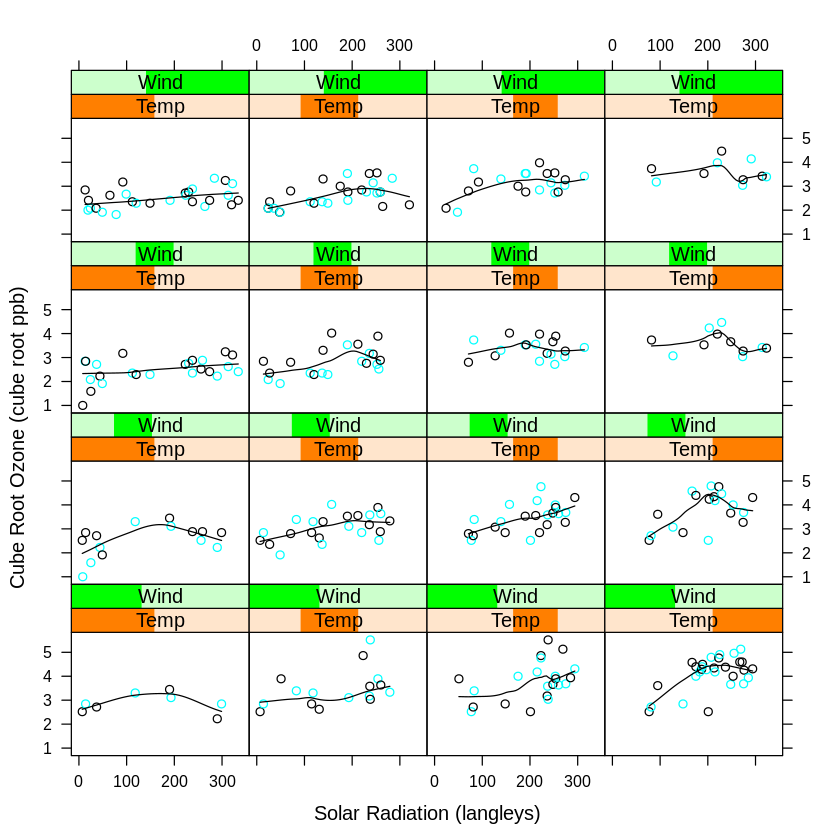

In [4]:
require(lattice)
require(stats)
df<-df[order(df$radiation),]
Wind <- equal.count(df$wind, number=4, overlap=0.5)
Temp <- equal.count(df$temperature, number=4, overlap=0.4)
graph <- xyplot(ozone^(1/3) ~ radiation | Temp * Wind,
                  data=df,layout = c(4,4),
                  type=c("p","smooth"), col = c("black", "cyan"),
                  xlab="Solar Radiation (langleys)",
                  ylab="Cube Root Ozone (cube root ppb)")


print(graph)

In [5]:
print(Wind)
print(Temp)


Data:
  [1]  6.9  9.7 12.0  9.2 20.1 16.6 13.8 10.9  9.7 10.3 14.3  9.2  9.7 14.3 10.3
 [16]  6.3 13.2 10.3  7.4 18.4  8.6 12.0  6.9 12.0 15.5  7.4 13.8 11.5  7.4  8.0
 [31] 11.5  9.7  8.0 10.3 10.3  8.0 12.6  9.7  6.9  4.6  7.4 14.9  2.8  5.1  6.3
 [46]  4.6  7.4 10.3 14.9 14.3 11.5  6.9  5.1  8.0  9.7  8.0  9.7  7.4  8.0 11.5
 [61] 10.3  5.7  8.0 11.5 13.8  2.3 10.3 10.9  9.2 14.9  6.3  6.9  3.4  6.3 10.3
 [76] 12.6 10.9  9.2 14.9 10.9  7.4  9.2  4.0  9.7 15.5  9.7 15.5  6.9 14.3  6.3
 [91]  4.0  5.7 11.5 10.9 10.3  7.4  5.1  7.4 20.7  6.3  9.2 13.8  8.6  8.6 12.0
[106] 11.5 10.9 16.6 11.5 11.5 11.5

Intervals:
    min   max count
1  2.05  9.45    49
2  6.65 10.55    50
3  8.95 12.85    47
4 10.05 20.95    53

Overlap between adjacent intervals:
[1] 31 25 32

Data:
  [1] 74 59 67 71 61 63 81 71 61 76 72 65 62 80 69 79 58 77 82 57 82 86 81 61 84
 [26] 87 59 71 76 72 73 82 76 76 81 82 74 80 91 83 89 81 93 87 94 93 67 78 77 75
 [51] 86 70 92 82 97 90 79 88 86 85 78 79 85 68 67 94 90 75

In [6]:
#Predefine intervals of the data for comparison
wind_min <- c(10.05,8.95,6.65,2.05)
wind_max <- c(20.95,12.85,10.55,9.45)
temp_min <- c(56.5,68.5,76.5,81,5)
temp_max <- c(75.5,81.5,86.5,97.5)

In [7]:
install.packages("gam", quiet = TRUE)

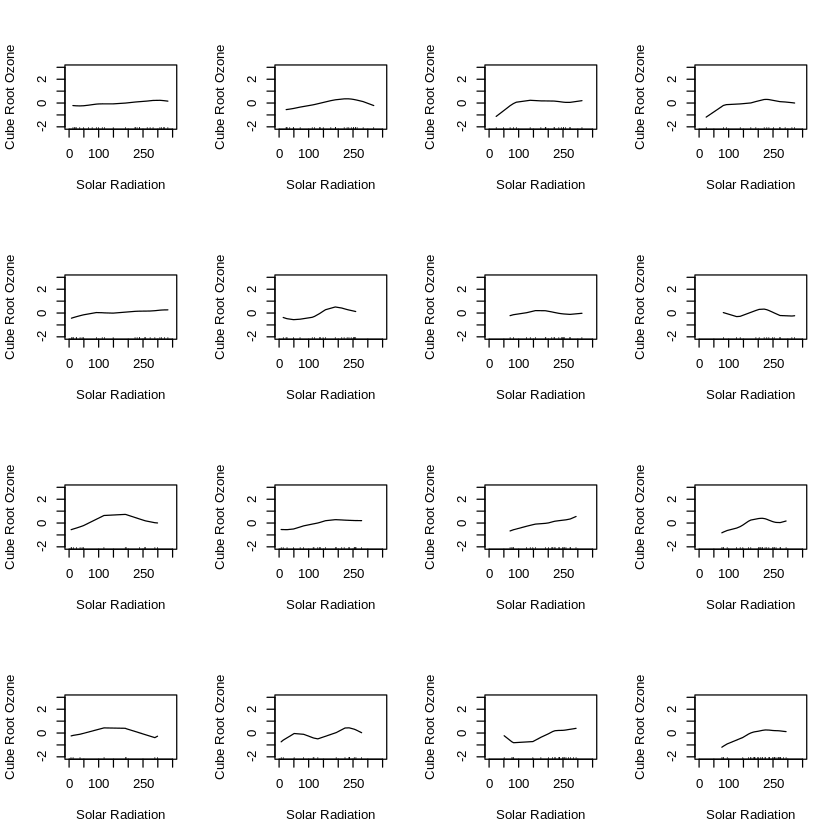

In [17]:
library(gam)
plot.new()
par(mfrow=c(4,4))
j=1
for (i in 1:4){
  for (ii in 1:4){
    model <- gam(ozone^(1/3) ~ s(radiation), 
                    data=df[(df$wind>=wind_min[i]&df$wind<=wind_max[i] & 
                             df$temperature>=temp_min[ii] & df$temperature<=temp_max[ii]),])
    plot(model,xlim=c(0,350), ylim=c(-2,3),xlab='Solar Radiation'
    ,ylab='Cube Root Ozone')
    j=j+1
  }
}

### **(b) Fit trees, MARS, and PRIM to the same data, and compare the results to those found in (a) and in Figure 6.9.**

### **1. Rank these 4 algorithms according to their decreasing prediction accuracy.**

#### **Explain why such ranking makes sense. Consider the prediction surface, observed response surface, flexibility of each algorithm**

### **2. Rank these 4 algorithms according to the variability of their predictions.**

#### **Explain why such ranking makes sense. Consider the prediction surface, observed response surface, flexibility of each algorithm.**


###  **3. Rank these 4 algorithms according to their decreasing (guesstimated) VC dimension (from highest to lowest)**


#### **You do not need to compute VC dimensions, but justify intuitively why your ranking makes sense.**

### **4. Which two algorithms are most similar (and how do you quantitatively measure this similarity)? Explain why this similarity makes sense.**

### **5. Which two algorithms are most dissimilar (and how do you quantitatively measure this dissimilarity)? Explain why this similarity makes sense.**